SC_SP 延遲之策略設計

注意，要記得更改的部分是

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from datetime import datetime, timedelta
import re
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties as font
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei') # 在圖表上顯示中文
import matplotlib.ticker as mtick
from collections import Counter

### 觀察從2024.01~2025.04績效變化

##### 持有跨夜

In [8]:
# 設定資料夾路徑
base_path = r'D:\CODE\SC_SP_delay\持有跨夜'

# 設定要讀取的年份與月份範圍
years = [2024, 2025]  # 你可以擴展年份範圍
months = [f"{month:02d}" for month in range(1, 13)]  # 產生 '01', '02', ..., '12'

# 儲存所有 DataFrame
df_list = []

# 迴圈讀取不同年份與月份的數據
for year in years:
    for month in months:
        file_path = f"{base_path}\\{month}_{year}_Result_PCP.csv"
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            df["Year"] = year
            df["Month"] = month 
            df_list.append(df)
            print(f"成功讀取: {file_path}")
        except FileNotFoundError:
            print(f"檔案不存在: {file_path}")

# 合併所有 DataFrame
df_combined_1 = pd.concat(df_list, ignore_index=True)
# 去除包含空值的數據
df_combined_1 = df_combined_1.dropna()

成功讀取: D:\CODE\SC_SP_delay\持有跨夜\01_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\02_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\03_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\04_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\05_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\06_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\07_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\08_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\09_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\10_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\11_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\12_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\01_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\02_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\03_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\04_2025_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\05_2025_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\06_2025_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay

In [9]:
# 去除 2025 年 4 月份的資料
df_combined_1 = df_combined_1[~((df_combined_1["Year"] == 2025) & (df_combined_1["Month"] == "04"))]

##### 不持有跨夜

In [10]:
# 設定資料夾路徑
base_path = r'D:\CODE\SC_SP_delay\不持有跨夜'

# 設定要讀取的年份與月份範圍
years = [2024, 2025]  # 你可以擴展年份範圍
months = [f"{month:02d}" for month in range(1, 13)]  # 產生 '01', '02', ..., '12'

# 儲存所有 DataFrame
df_list = []

# 迴圈讀取不同年份與月份的數據
for year in years:
    for month in months:
        file_path = f"{base_path}\\{month}_{year}_Result_PCP.csv"
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            df["Year"] = year
            df["Month"] = month 
            df_list.append(df)
            print(f"成功讀取: {file_path}")
        except FileNotFoundError:
            print(f"檔案不存在: {file_path}")

# 合併所有 DataFrame
df_combined_2 = pd.concat(df_list, ignore_index=True)

# 去除包含空值的數據
df_combined_2 = df_combined_2.dropna()

成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\01_2024_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\02_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\03_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\04_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\05_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\06_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\07_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\08_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\09_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\10_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\11_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\12_2024_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\01_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\02_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\03_2025_Result_PCP.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\04_2025_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\05_2025_Result_PCP.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\06_2025_Result_PCP.csv
檔案不存在: 

In [11]:
# 去除 2025 年 4 月份的資料
df_combined_2 = df_combined_2[~((df_combined_2["Year"] == 2025) & (df_combined_2["Month"] == "04"))]

In [12]:
def add_numeric_index(df_origin_pcp):
    """
    為 `df_origin_pcp` 新增數字索引 (0, 1, 2, 3...)，但保留原始 PCP 編碼。
    """
    df_origin_pcp1 = df_origin_pcp.reset_index(drop=True)  # **重設索引，使其變為 0, 1, 2, ...**
    df_origin_pcp["PCP_ID"] = df_origin_pcp1.index  # **新增編碼作為 PCP_ID**

    return df_origin_pcp

df_combined_1 = add_numeric_index(df_combined_1)
df_combined_2 = add_numeric_index(df_combined_2)

In [13]:
def plot_pcp_performance(df_pcp_results):
    """
    視覺化 PCP 策略績效，並計算最終的總損益：
    1. 每一筆 PCP 策略的績效差異（Bar Chart）
    2. 總累積績效（Line Chart）
    3. 計算並打印最終總損益
    """

    # **提取績效數據**
    pcp_ids = df_pcp_results["PCP_ID"]
    max_profit_origin = df_pcp_results["Max Profit Origin"]
    max_profit_final = df_pcp_results["Max Profit Final"]
    max_loss_final = df_pcp_results["Max Loss Final"]

    # **計算累積績效**
    cumulative_profit_origin = np.cumsum(max_profit_origin)
    cumulative_profit_final = np.cumsum(max_profit_final.fillna(0))  # 避免 NaN
    cumulative_loss_final = np.cumsum(max_loss_final.fillna(0))  # 避免 NaN

    # **📊 每一筆 PCP 策略績效**
    plt.figure(figsize=(14, 8))
    width = 0.4  # 設定柱狀圖寬度
    plt.bar(pcp_ids - width/2, max_profit_origin, width=width, label="原始 PCP", color="green")
    plt.bar(pcp_ids + width/2, max_profit_final, width=width, label="改良 PCP", color="red")
    plt.title("每一筆 PCP 策略績效")
    plt.xlabel("PCP ID")
    plt.ylabel("Profit")
    plt.legend()
    plt.grid(True)
    plt.show()

    # **📈 總累積績效**
    plt.figure(figsize=(10, 5))
    plt.plot(pcp_ids, cumulative_profit_origin, label="累積原始 PCP 績效", linestyle="dashed", color="green")
    plt.plot(pcp_ids, cumulative_profit_final, label="累積改良 PCP 最佳報酬", linestyle="solid", color="red")
    plt.plot(pcp_ids, cumulative_loss_final, label="累積改良 PCP 最差報酬", linestyle="solid", color="blue")
    plt.title("總累積績效比較")
    plt.xlabel("PCP ID")
    plt.ylabel("Cumulative Profit/Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # **🔹 計算最終總損益**
    total_profit_origin = max_profit_origin.sum()
    total_profit_final = max_profit_final.sum()
    total_loss_final = max_loss_final.sum()

    print(f"原始 PCP 最終總損益: {total_profit_origin:.2f}")
    print(f"改良 PCP 最終總損益(最佳情況): {total_profit_final:.2f}")
    print(f"改良 PCP 最終總損益(最差情況): {total_loss_final:.2f}")
    print(f"最佳情況獲利: {total_profit_final - total_profit_origin:.2f}")
    print(f"最差情況獲利: {total_loss_final - total_profit_origin:.2f}")

c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


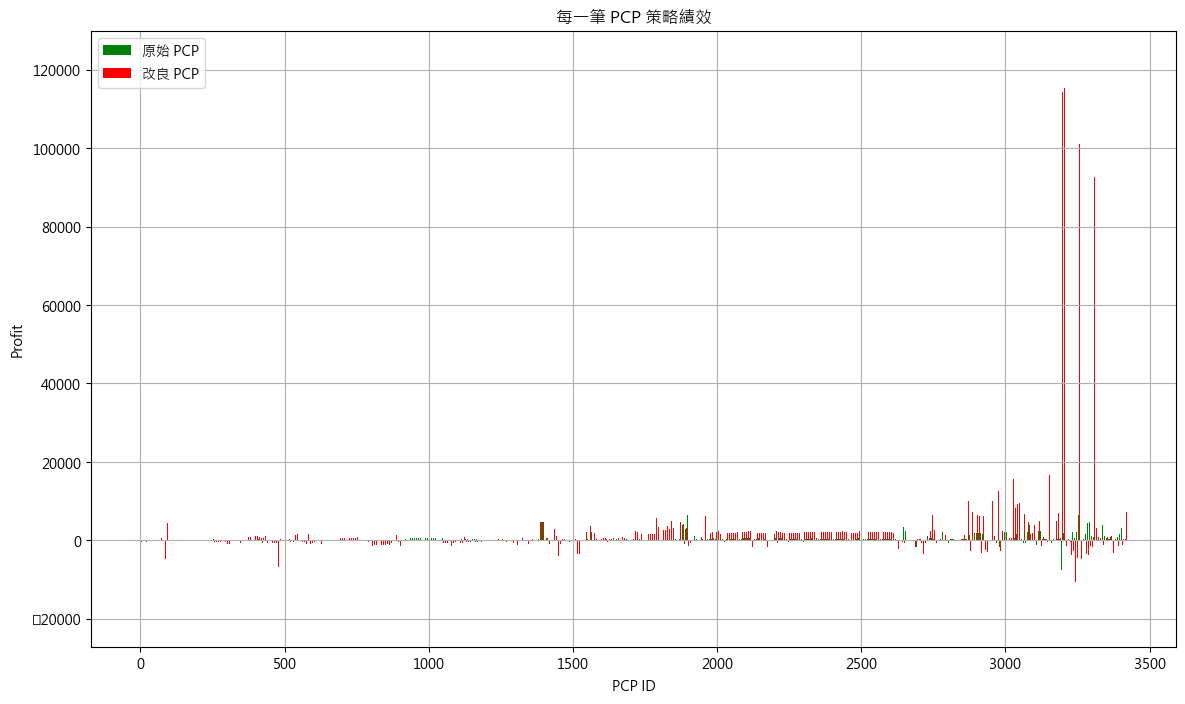

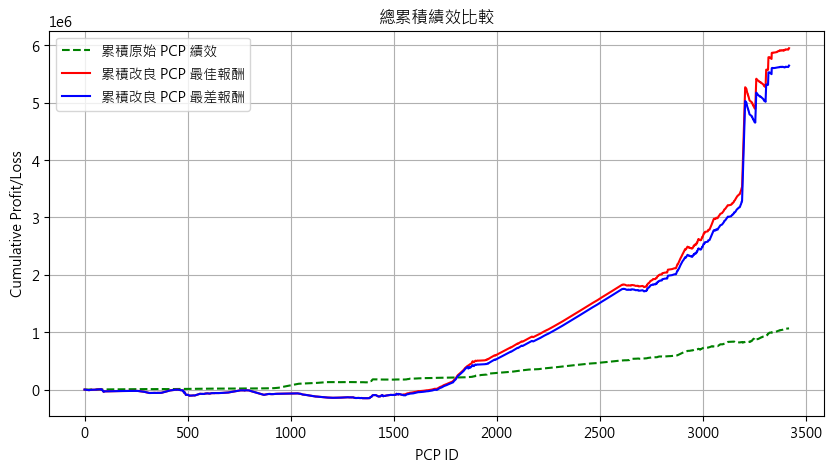

原始 PCP 最終總損益: 1065315.00
改良 PCP 最終總損益(最佳情況): 5945883.60
改良 PCP 最終總損益(最差情況): 5643383.60
最佳情況獲利: 4880568.60
最差情況獲利: 4578068.60


In [6]:
plot_pcp_performance(df_combined_1)

c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


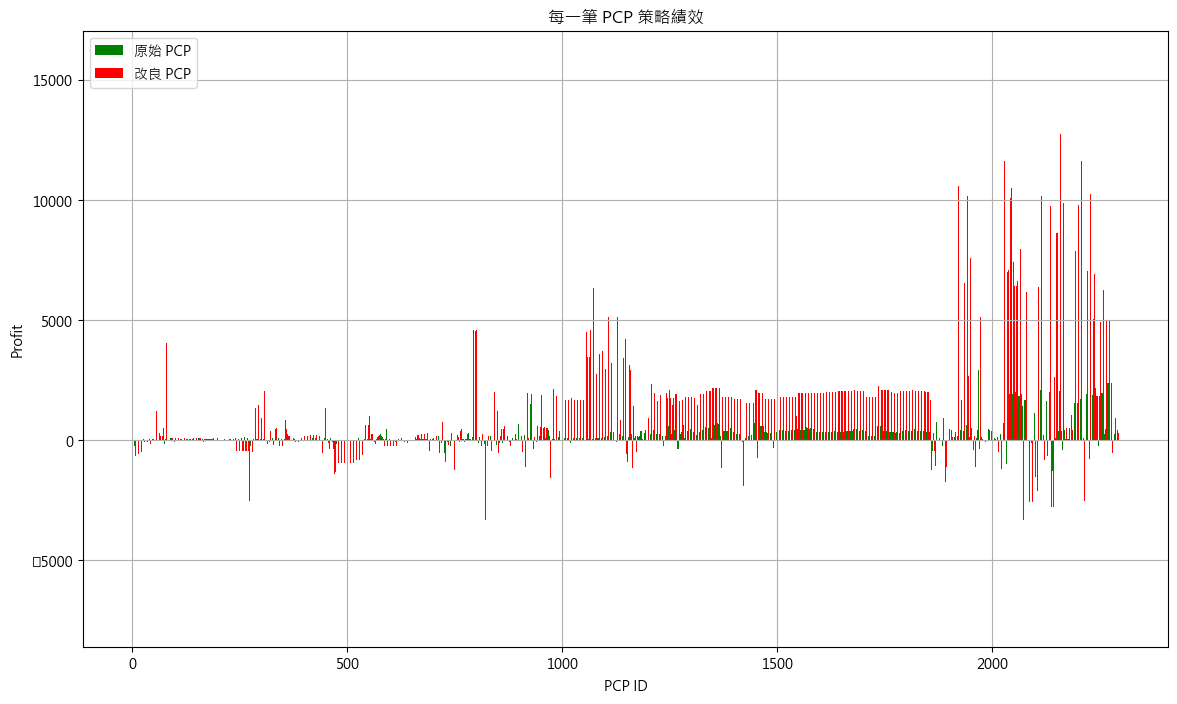

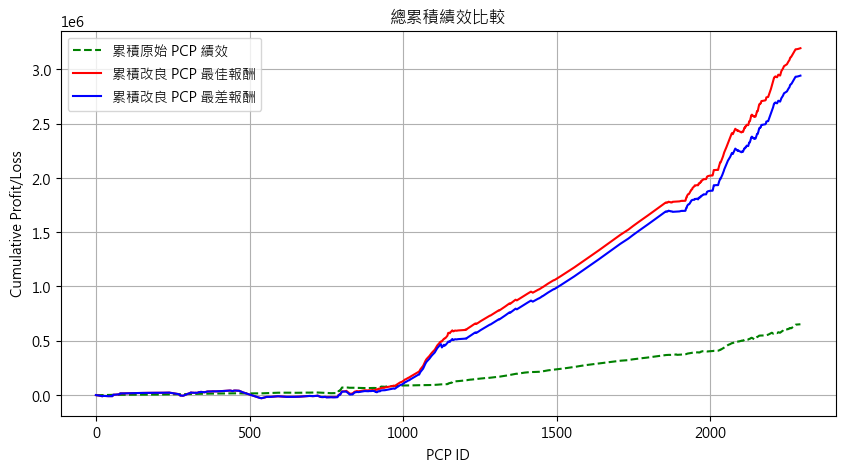

原始 PCP 最終總損益: 652217.00
改良 PCP 最終總損益(最佳情況): 3194827.56
改良 PCP 最終總損益(最差情況): 2942327.56
最佳情況獲利: 2542610.56
最差情況獲利: 2290110.56


In [14]:
plot_pcp_performance(df_combined_2)

### 觀察2024年整年績效變化

##### 持有跨夜

In [8]:
df_2024 = df_combined_1[df_combined_1['Year'] == 2024]

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_8332\1708325553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_pcp["PCP_ID"] = df_origin_pcp1.index  # **新增編碼作為 PCP_ID**


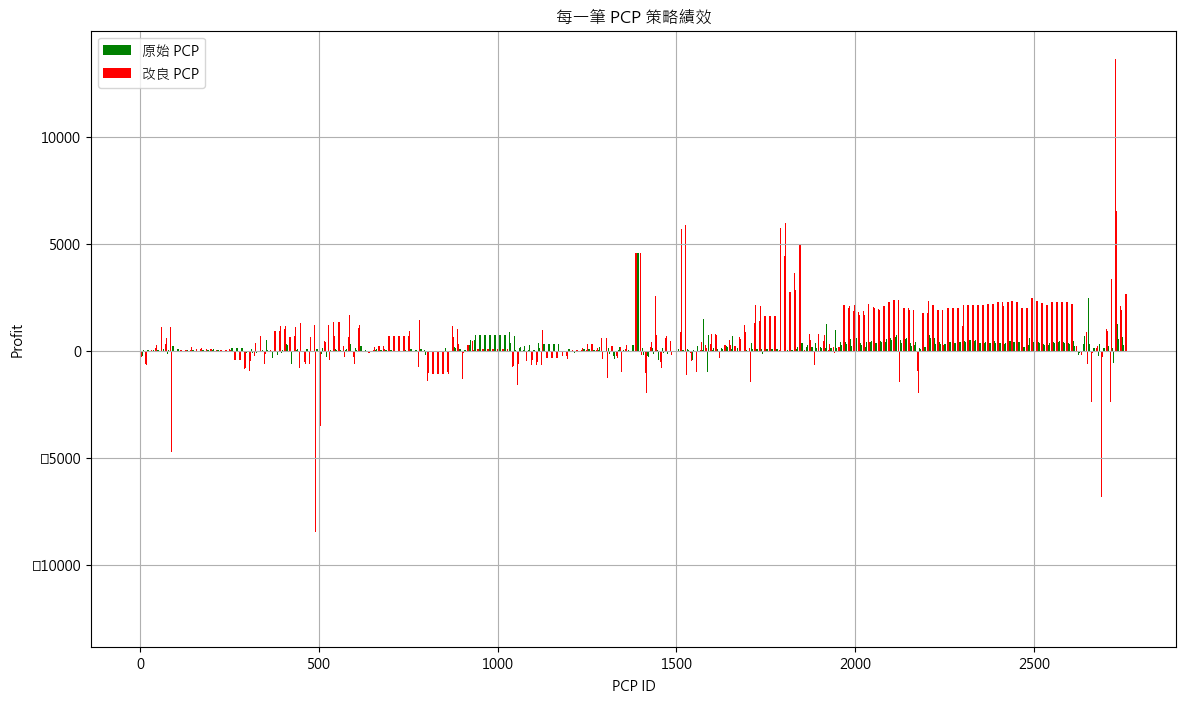

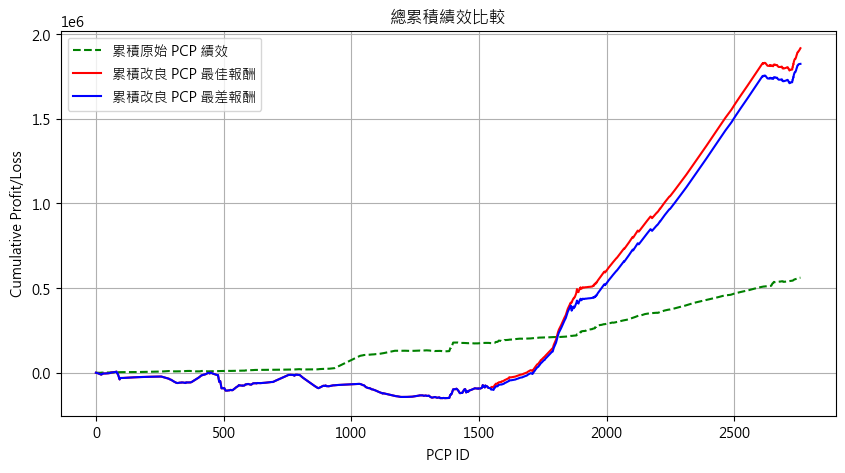

原始 PCP 最終總損益: 561090.00
改良 PCP 最終總損益(最佳情況): 1916726.50
改良 PCP 最終總損益(最差情況): 1824226.50
最佳情況獲利: 1355636.50
最差情況獲利: 1263136.50


In [9]:
df_2024 = add_numeric_index(df_2024)
plot_pcp_performance(df_2024)

##### 不持有跨夜

In [10]:
df_2024_02 = df_combined_2[df_combined_2['Year'] == 2024]

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_8332\1708325553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_pcp["PCP_ID"] = df_origin_pcp1.index  # **新增編碼作為 PCP_ID**


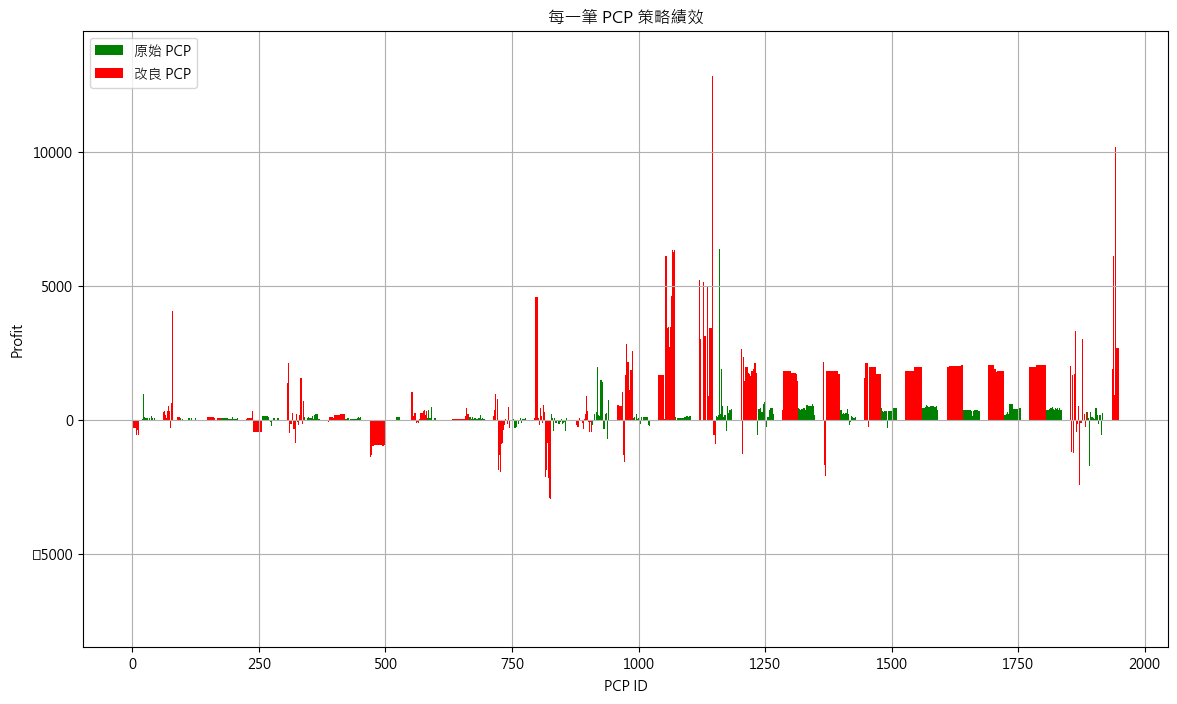

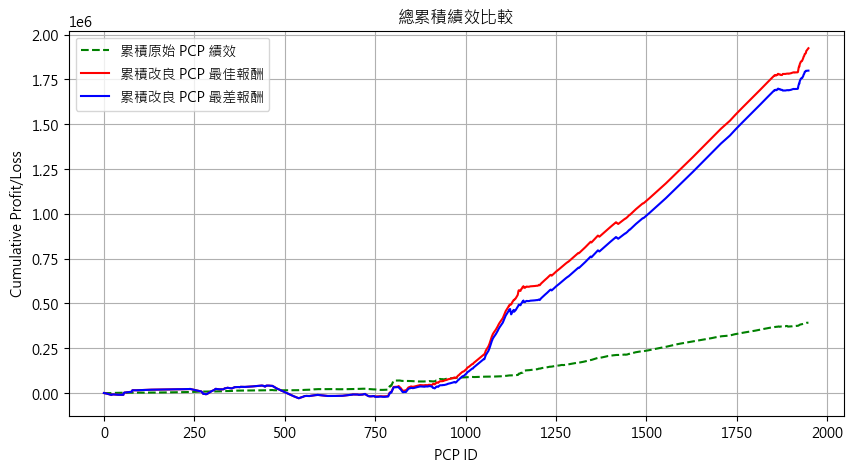

原始 PCP 最終總損益: 392141.00
改良 PCP 最終總損益(最佳情況): 1923743.99
改良 PCP 最終總損益(最差情況): 1798743.99
最佳情況獲利: 1531602.99
最差情況獲利: 1406602.99


In [11]:
df_2024_02 = add_numeric_index(df_2024_02)
plot_pcp_performance(df_2024_02)

### 觀察2025年整年績效變化

##### 持有跨夜

In [12]:
df_2025 = df_combined_1[df_combined_1['Year'] == 2025]

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_14180\1708325553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_pcp["PCP_ID"] = df_origin_pcp1.index  # **新增編碼作為 PCP_ID**
c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


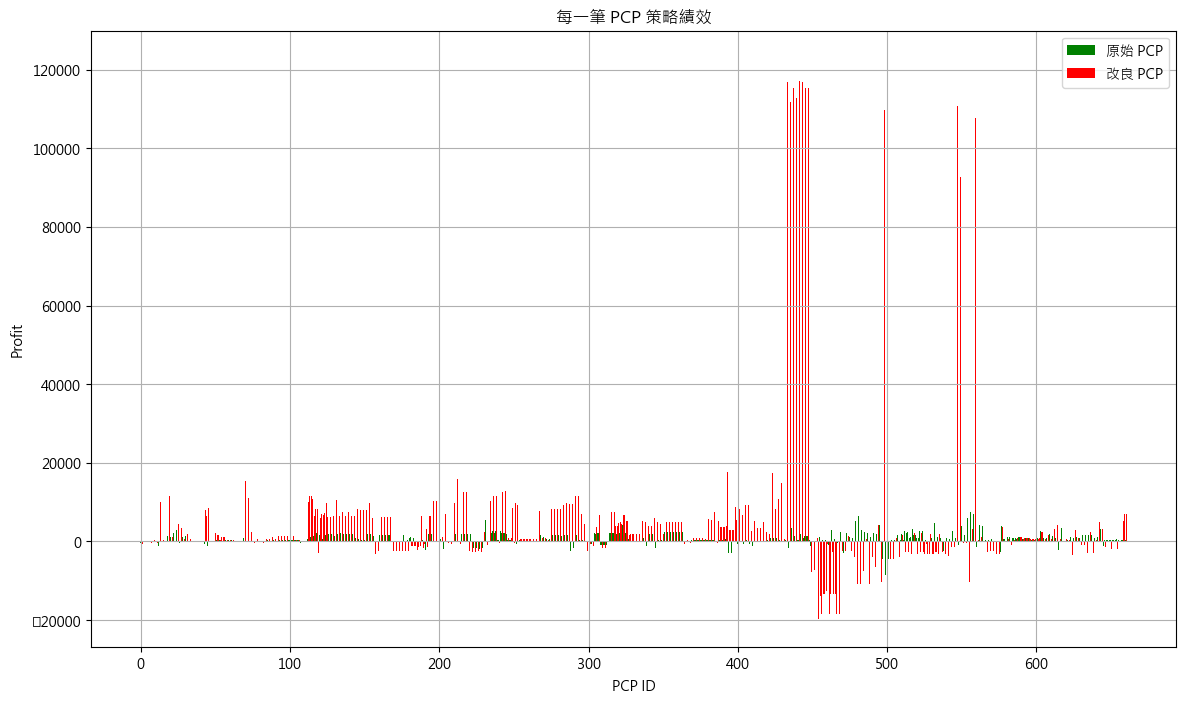

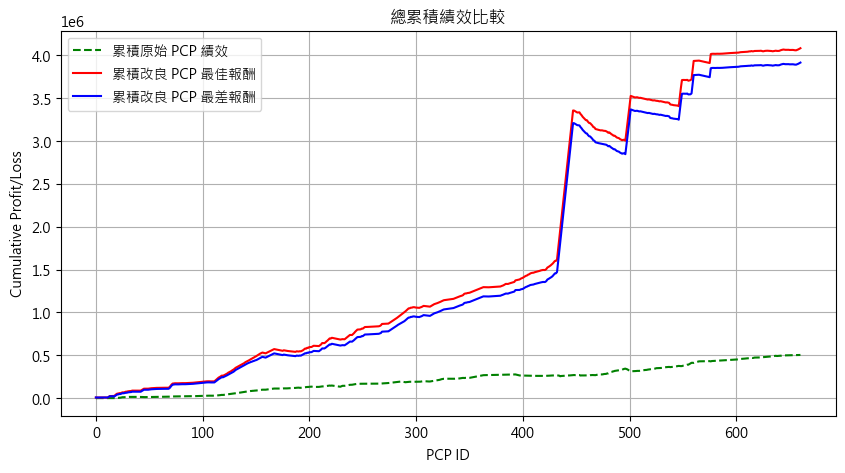

原始 PCP 最終總損益: 504225.00
改良 PCP 最終總損益(最佳情況): 4081795.48
改良 PCP 最終總損益(最差情況): 3914295.48
最佳情況獲利: 3577570.48
最差情況獲利: 3410070.48


In [21]:
df_2025 = add_numeric_index(df_2025)
plot_pcp_performance(df_2025)

##### 不持有跨夜

In [13]:
df_2025_02 = df_combined_2[df_combined_2['Year'] == 2025]

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_8332\1708325553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_pcp["PCP_ID"] = df_origin_pcp1.index  # **新增編碼作為 PCP_ID**


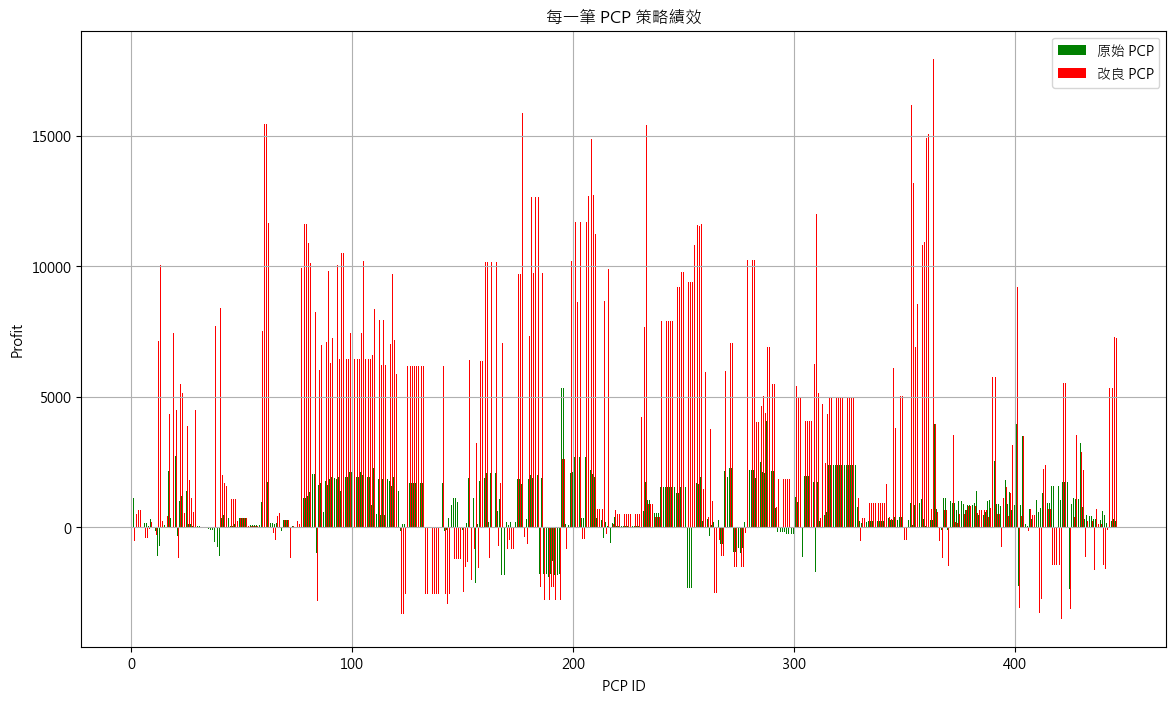

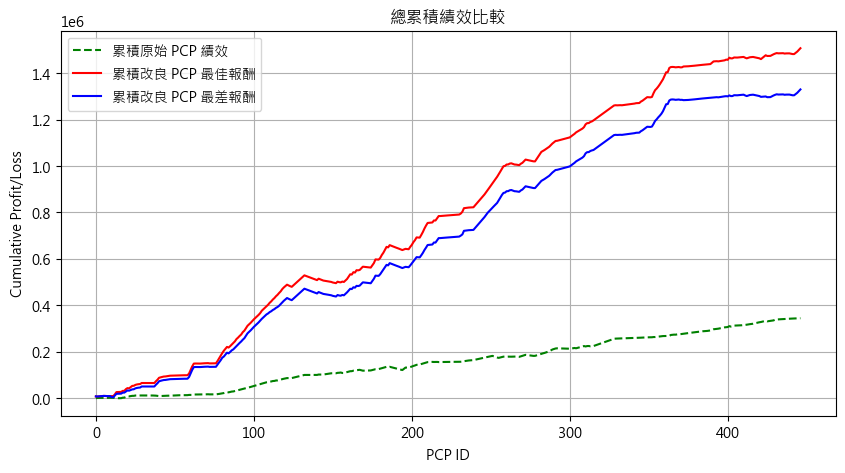

原始 PCP 最終總損益: 344115.00
改良 PCP 最終總損益(最佳情況): 1507115.66
改良 PCP 最終總損益(最差情況): 1329615.66
最佳情況獲利: 1163000.66
最差情況獲利: 985500.66


In [14]:
df_2025_02 = add_numeric_index(df_2025_02)
plot_pcp_performance(df_2025_02)